# Limpieza de datos en Python
En este cuaderno vamos a hacer una introducción a la limpieza de datos en Python.

La primera celda importa los principales paquetes que utilizaremos.

In [4]:
# Importa las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tarea 1: Carga e inspección de los datos

Trabajaremos con un conjunto de datos de audiolibros descargados de audible.in entre 1998 y 2025 (lanzamientos planificados). [Fuente](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

Lo primero que haremos será cargar los datos audibles sin procesar.

### Instrucciones:
* Con Pandas, lee el archivo `audible_raw.csv`, ubicado en la carpeta `data` de nuestro directorio local. Asígnalo a `audible`.
* Muestra las primeras filas del dataframe `audible`.

In [5]:
# Carga el archivo audible_raw.csv
audible = pd.read_csv("audible_raw.csv")

# Muestra las primeras filas del dataframe
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


### Columnas de datos

- "name": El nombre del audiolibro.
- "author": El autor del audiolibro.
- "narrator": El narrador del audiolibro.
- "time": La duración del audiolibro, en horas y minutos.
- "releasedate": La fecha de publicación del audiolibro.
- "language": El idioma del audiolibro.
- "stars": El promedio de estrellas (sobre 5) y el número de valoraciones (si están disponibles).
- "price": El precio del audiolibro en INR (rupias indias).

Podemos utilizar el método `.info()` para inspeccionar los tipos de datos de las columnas

In [6]:
# Inspecciona los tipos de datos de las columnas
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Tarea 2: Limpiar los datos de texto en las columnas Author y Narrator

Comenzaremos a limpiar algunas columnas de texto como `author` y `narrator`. Podemos eliminar las secciones `Writtenby:` y `Narratedby:` del texto en esas columnas.

Para ello, usaremos el método `.str.replace()`

### Instrucciones:
* Eliminar `Writtenby:` de la columna `author`
* Eliminar `Narratedby:` de la columna `narrator`
* Verificar los resultados

In [7]:
# Borra Writtenby: de la columna author
audible['author'] = audible['author'].str.replace('Writtenby:', '')

# Borra Narratedby: de la columna narrator
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')

# Chequea los resultados
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


## Tarea 3: Extraer el número de estrellas y calificaciones de la columna Stars.

La columna `stars` combina el número de estrellas y el número de calificaciones. Convirtámoslo en números y dividámoslo en dos columnas: `rating_stars` y `n_ratings`.

Primero, usaremos el método `.sample()` para comprender el tipo de entradas en esa columna.

In [8]:
# Obtiene una muestra de la columna stars
audible.stars.sample(n=10)

83484                  Not rated yet
36228                  Not rated yet
43195                  Not rated yet
28282    4.5 out of 5 stars8 ratings
10580    4.5 out of 5 stars3 ratings
82340                  Not rated yet
13383                  Not rated yet
13650                  Not rated yet
65174                  Not rated yet
74615                  Not rated yet
Name: stars, dtype: object

Dado que hay muchos casos de "Not rated yet", los filtrémoslos y mostramos nuevamente:

In [9]:
# Explora los valores de la columna stars que no son 'Not rated yet'
audible[audible.stars != 'Not rated yet'].stars.sample(n=10)

77398    4.5 out of 5 stars3 ratings
68671       5 out of 5 stars1 rating
35657      5 out of 5 stars2 ratings
48287      5 out of 5 stars2 ratings
61378       5 out of 5 stars1 rating
55835       5 out of 5 stars1 rating
12581      4 out of 5 stars4 ratings
57998       3 out of 5 stars1 rating
70009       5 out of 5 stars1 rating
40536       5 out of 5 stars1 rating
Name: stars, dtype: object

Como primer paso, podemos reemplazar las instancias de `Not rated yet` con `NaN`

In [10]:
# Reemplaza 'Not rated yet' con NaN
audible.stars.replace('Not rated yet', np.nan, inplace=True)

C:\Users\jmfdiaz\AppData\Local\Temp\ipykernel_10344\912956735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  audible.stars.replace('Not rated yet', np.nan, inplace=True)


Podemos usar `.str.extract()` para obtener el número de estrellas y el número de calificaciones en sus respectivas columnas.

### Instrucciones:
* Extraer el número de estrellas en la columna `rating_stars`
* Extraer el número de calificaciones en la columna `n_ratings`
* Convertir ambas columnas nuevas a coma flotante

In [11]:
# Extrae el número de estrellas en rating_stars y lo convierte en float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)

# Reemplaza la coma, extrae el número de valoraciones en n_ratings y lo convierte en float
audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)

# Examina las nuevas columnas rating_stars y n_ratings
audible[['rating_stars', 'n_ratings']]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jmfdiaz\AppData\Local\Temp\ipykernel_10344\1710715090.py:2: SyntaxWarning: invalid escape sequence '\d'
  audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)
C:\Users\jmfdiaz\AppData\Local\Temp\ipykernel_10344\1710715090.py:5: SyntaxWarning: invalid escape sequence '\d'
  audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)


,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


Como último paso, eliminemos la columna `stars` usando el comando `.drop`:

In [12]:
# Elimina la columna stars
audible.drop('stars', axis=1, inplace=True)

# Chequea los resultados
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


## Tarea 4: Cambiar los tipos de datos

Otro paso importante es que nuestros datos tengan los tipos de datos correctos.

### Instrucciones:
* Establecer `price` en float
* Convertir `rating_stars` en category
* Convertir `releasedate` en datetime

In [13]:
# Explora la columna price
audible.price.sample(n=10)

1448       233.00
42372    1,328.00
61545      703.00
74027      820.00
41322    1,131.00
50104      585.00
42786      703.00
26735       32.00
24136      879.00
16952      121.00
Name: price, dtype: object

Necesitamos deshacernos de la coma y la palabra "Free" antes de poder convertir los datos.

In [14]:
# Reemplaza la coma con ''
audible['price'] = audible.price.str.replace(',', '')

# Reemplaza 'Free' con 0
audible['price'] = audible.price.str.replace('Free', '0')

# Convierte price a float
audible['price'] = audible.price.astype(float)

* Convertir `rating_stars` en category

Dado que `stars` solo admite un número reducido de valores discretos, el mejor tipo de dato para la columna es `category`.

Primero, veamos los valores únicos de esa columna para confirmarlo:

In [15]:
# Mira los valores únicos en la columna rating_stars
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

Ahora podemos usar `.astype` para cambiar el tipo de datos.

In [16]:
# Cambia rating_stars a categoría
audible['rating_stars'] = audible.rating_stars.astype('category')

* Convertir la fecha `releasedate` en fecha y hora

Aquí usaremos la función `to_datetime()` para convertir las fechas en objetos de fecha y hora:

In [17]:
# Convierte releasedate a datetime
audible['releasedate'] = pd.to_datetime(audible.releasedate)

# Inspecciona el dataframe 
audible.info()

C:\Users\jmfdiaz\AppData\Local\Temp\ipykernel_10344\1157537666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  audible['releasedate'] = pd.to_datetime(audible.releasedate)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


## Tarea 5: Extraer horas y minutos de la columna `time`

La columna `time` combina el número de horas y minutos en una sola columna. Queremos transformar y consolidar la información en una nueva columna `time_minutes`.

In [18]:
# Explora los valores en la columna time
audible.time.sample(n=10)

18391    24 hrs and 39 mins
782                 31 mins
21021     3 hrs and 57 mins
538      16 hrs and 17 mins
10625      7 hrs and 2 mins
32042     5 hrs and 42 mins
27947               23 mins
32976     6 hrs and 10 mins
20167     4 hrs and 45 mins
19685     4 hrs and 58 mins
Name: time, dtype: object

Veamos de qué otras formas han codificado `min` o `minutes`:

In [19]:
# Busca las entradas en la columna time para diferentes formas de escribir min. Probamos con min, mins, minutes
audible.time[audible.time.str.contains('min')].sample(n=10)

71028    10 hrs and 22 mins
54463     4 hrs and 34 mins
9162                 5 mins
48971     2 hrs and 14 mins
21889       2 hrs and 1 min
83190     7 hrs and 30 mins
15141     2 hrs and 31 mins
51272    13 hrs and 33 mins
56545     9 hrs and 27 mins
38451    39 hrs and 15 mins
Name: time, dtype: object

Podemos ver que necesitamos corregir lo siguiente:
* hr, hrs -> consolidar como `hr`
* min, mins -> consolidar como `min`
* Menos de 1 minuto -> redondear a 1 min

In [20]:
# Reemplaza hrs, mins, and 'Less than 1 minute'
audible['time'] = audible.time.str.replace('hrs', 'hr')
audible['time'] = audible.time.str.replace('mins', 'min')
audible['time'] = audible.time.str.replace('Less than 1 minute', '1 min')

Veamos cómo se ve ahora:

In [21]:
# Chequea los resultados
audible[['time']]

,time
0,2 hr and 20 min
1,13 hr and 8 min
2,2 hr and 3 min
3,11 hr and 16 min
4,10 hr
...,...
87484,7 hr and 34 min
87485,10 hr and 7 min
87486,19 hr and 4 min
87487,4 hr and 8 min


El siguiente paso es extraer la cantidad de horas y minutos del texto y combinarlos en una nueva columna `time_mins`.

### Instrucciones:
* Extraer la cantidad de horas de `time`. Asignar a la variable `hours`.
* Extraer la cantidad de minutos de `time`. Asignar a la variable `mins`.
* Crear la columna `time_mins` combinando horas y minutos.

In [22]:
# Extrae el número de horas, convierte a entero
hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)

# Extrae el número de minutos, convierte a entero
mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)

# Combina horas y minutos en la columna time_mins
audible['time_mins'] = 60 * hours + mins

# Chequea los resultados
audible[['time_mins']]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jmfdiaz\AppData\Local\Temp\ipykernel_10344\2425269926.py:2: SyntaxWarning: invalid escape sequence '\d'
  hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)
C:\Users\jmfdiaz\AppData\Local\Temp\ipykernel_10344\2425269926.py:5: SyntaxWarning: invalid escape sequence '\d'
  mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)


,time_mins
0,140
1,788
2,123
3,676
4,600
...,...
87484,454
87485,607
87486,1144
87487,248


Y como paso final, eliminemos las columnas que ya no necesitamos:

In [23]:
# Borrar la columna time
audible.drop(columns=['time'], axis=1, inplace=True)

Así es como queda nuestro dataframe ahora:

In [24]:
# Inspecciona el dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     15072 non-null  float64       
 8   time_mins     87489 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.4+ MB


## Tarea 6: Verificar rangos de datos

Otro paso importante es confirmar que los valores de nuestras columnas se encuentren dentro de los rangos esperados y que no haya valores fuera de rango.

Vamos a crear un histograma de las columnas numéricas para inspeccionar visualmente los rangos de altura y la forma de la distribución:

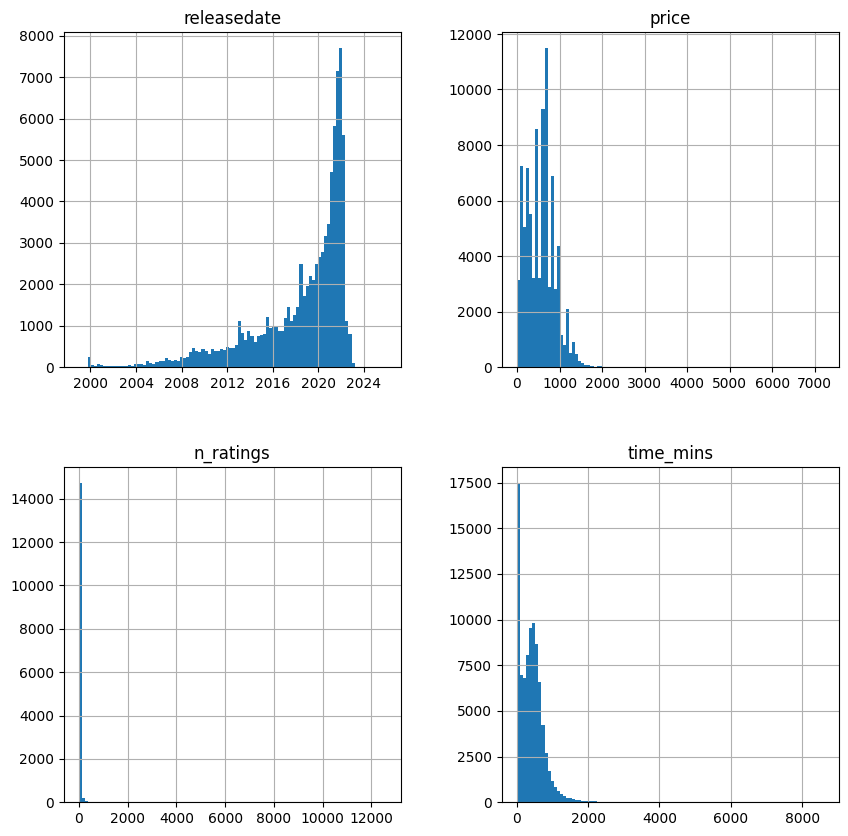

In [25]:
# Mostramos un plot de histogramas de todas las columnas numéricas
audible.hist(figsize=(10,10), bins=100)
plt.show()

Además, podemos usar `.describe()` para ver un resumen de nuestros datos.

In [26]:
# Mira las columnas numéricas
audible.describe()

,releasedate,price,n_ratings,time_mins
count,87489,87489.000000,15072.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,559.009246,21.613190,417.497663
min,1998-12-27 00:00:00,0.000000,1.000000,1.000000
25%,2016-08-30 00:00:00,268.000000,1.000000,142.000000
50%,2020-01-30 00:00:00,585.000000,2.000000,386.000000
75%,2021-08-04 00:00:00,755.000000,7.000000,584.000000
max,2025-11-14 00:00:00,7198.000000,12573.000000,8595.000000
std,NaN,336.096642,207.479634,364.559399


In [27]:
# Mira las columnas no numéricas
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


Para este ejercicio, transformaremos los precios de `price` a USD. Podemos usar el tipo de cambio de 1 USD = 0,012 INR:

In [28]:
# Transforma precios a USD (multiplica por 0.012)
audible['price'] = audible.price * .012

# Chequea los resultados
audible['price'].describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

Los valores de la columna `language` tienen mayúsculas y minúsculas diferentes. Vamos a corregirlo.

In [29]:
# Inspecciona la columna de idioma antes de hacer cambios
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [30]:
# Actualiza la capitalización en la columna de idioma
audible['language'] = audible.language.str.capitalize()

# Chequea los resultados
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

## Tarea 7: Comprobación de duplicados

¿Cuántos duplicados tenemos?

Primero, busca duplicados usando `.duplicated()` y `.sum()`:

In [31]:
# Busca filas duplicadas
audible.duplicated().sum()

np.int64(0)

Es útil buscar duplicados solo usando un subconjunto de columnas que tengan sentido. Usaremos el siguiente subconjunto de columnas:
* name
* author
* narrator
* time_mins
* price

Aquí usamos `.duplicated()` de nuevo, pero con nuestro subconjunto de columnas.

In [32]:
# Crea una lista de nuestras columnas de subconjunto y asignarla a subset_cols
subset_cols=['name', 'author', 'narrator', 'time_mins', 'price']

# Chequea duplicados usando nuestro subconjunto de columnas
audible.duplicated(subset=subset_cols).sum()

np.int64(70)

Veamos esos valores (usa `keep=false`) y mira qué está pasando:

In [33]:
# Chequea las filas duplicadas manteniendo los duplicados y ordena por la columna name
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by=['name'])

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,5.472,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,English,4.776,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,English,0.900,5.0,1823.0,75


Podemos ver que los duplicados corresponden a archivos con diferentes fechas de lanzamiento. Podemos optar por conservar el registro con la última fecha de lanzamiento.

Podemos usar el método `drop_duplicates()` con el mismo subconjunto y `keep=last` para conservar la última fecha de lanzamiento.

In [34]:
# Elimina filas duplicadas manteniendo la última fecha de lanzamiento
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

Podemos comprobar nuevamente si hay duplicados:

In [35]:
# Chequea nuevamente duplicados usando nuestro subconjunto de columnas
audible.duplicated(subset=subset_cols).sum()

np.int64(0)

## Tarea 8: Manejo de datos faltantes

Antes de terminar, analicemos los datos faltantes en nuestras columnas. Podemos usar el método `.isna()` y encadenarlo con `.sum()` para obtener el total:

In [36]:
# Chequea valores nulos
audible.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

Podríamos convertir los valores **NaN** a 0 u otro valor numérico, o podríamos mantenerlos. Depende de nuestro caso de uso.

Si queremos representar la distribución de valoraciones, puede tener sentido conservar los valores perdidos (los audiolibros sin valoración pueden tener una estructura de precios diferente a los valorados).

Por ahora mantendremos los audiolibros sin valorar.

## Tarea 9: Guardar el conjunto de datos limpio

Podemos usar el método `.to_csv` para guardar el archivo limpio. Incluimos el parámetro `index=False` para no copiar también el índice actual en el archivo de destino.

In [37]:
# Guarda el dataframe en un nuevo archivo: 'audible_clean.csv'
audible.to_csv('audible_clean.csv', index=False)